In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

X = df[['MedInc']].values
y = df['MedHouseValue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("--- Polynomial Regression (degree=2) ---")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

--- Polynomial Regression (degree=2) ---
RMSE: 0.8386
R² Score: 0.4633


In [4]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

model3 = LinearRegression()
model3.fit(X_train_poly3, y_train)

y_pred3 = model3.predict(X_test_poly3)

rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
r2_3 = r2_score(y_test, y_pred3)

print("--- Polynomial Regression (degree=3) ---")
print(f"RMSE: {rmse3:.4f}")
print(f"R² Score: {r2_3:.4f}")

--- Polynomial Regression (degree=3) ---
RMSE: 0.8356
R² Score: 0.4671


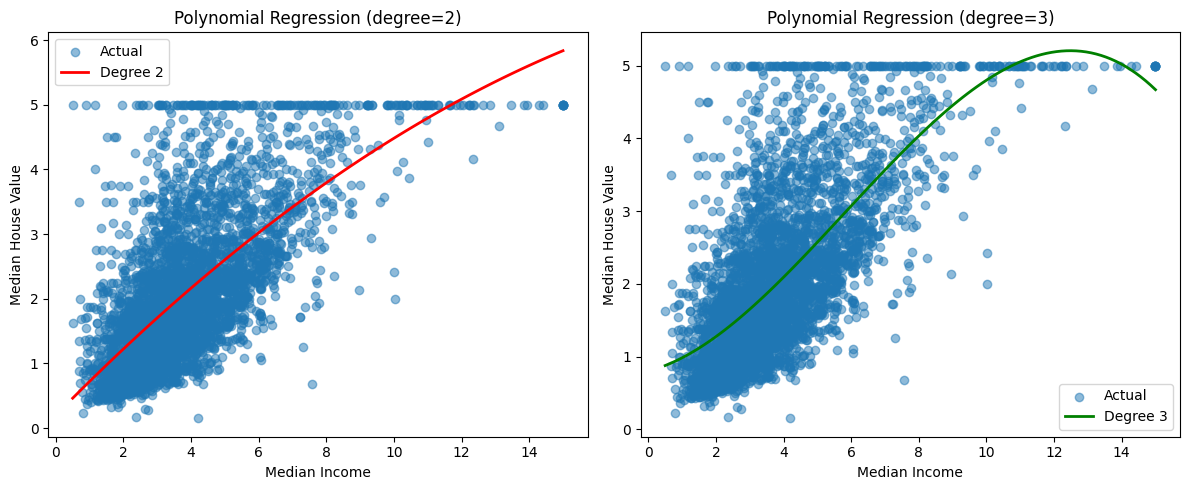

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line = model.predict(X_line_poly)
plt.plot(X_line, y_line, 'r-', linewidth=2, label='Degree 2')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Polynomial Regression (degree=2)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
X_line_poly3 = poly3.transform(X_line)
y_line3 = model3.predict(X_line_poly3)
plt.plot(X_line, y_line3, 'g-', linewidth=2, label='Degree 3')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Polynomial Regression (degree=3)')
plt.legend()

plt.tight_layout()
plt.show()